# 1. Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


# 2. Load and Prepare Dataset

In [ ]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (0–255) → (0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# For NN (flattened input)
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

# For CNN (need 3D input: 28×28×1)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Class names (for display)
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# 3. Build a Basic Neural Network (NN)

In [ ]:
nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
# Train NN model
history_nn = nn_model.fit(X_train_flat, y_train, epochs=10, batch_size=128,
                          validation_split=0.1, verbose=2)

# Evaluate NN model
nn_test_loss, nn_test_acc = nn_model.evaluate(X_test_flat, y_test, verbose=0)
print(f"🧠 Neural Network Test Accuracy: {nn_test_acc:.4f}")

Epoch 1/10
422/422 - 5s - 12ms/step - accuracy: 0.8041 - loss: 0.5737 - val_accuracy: 0.8403 - val_loss: 0.4497
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.8584 - loss: 0.4021 - val_accuracy: 0.8613 - val_loss: 0.3890
Epoch 3/10
422/422 - 1s - 3ms/step - accuracy: 0.8714 - loss: 0.3564 - val_accuracy: 0.8727 - val_loss: 0.3550
Epoch 4/10
422/422 - 1s - 3ms/step - accuracy: 0.8796 - loss: 0.3308 - val_accuracy: 0.8723 - val_loss: 0.3571
Epoch 5/10
422/422 - 2s - 4ms/step - accuracy: 0.8874 - loss: 0.3108 - val_accuracy: 0.8798 - val_loss: 0.3290
Epoch 6/10
422/422 - 1s - 3ms/step - accuracy: 0.8911 - loss: 0.2964 - val_accuracy: 0.8748 - val_loss: 0.3381
Epoch 7/10
422/422 - 1s - 3ms/step - accuracy: 0.8964 - loss: 0.2831 - val_accuracy: 0.8827 - val_loss: 0.3300
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9009 - loss: 0.2714 - val_accuracy: 0.8853 - val_loss: 0.3206
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9031 - loss: 0.2637 - val_accuracy: 0.8887 - val_loss: 0.3124


# 4. Build a Convolutional Neural Network (CNN)

In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train CNN model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=128,
                            validation_split=0.1, verbose=2)

# Evaluate CNN model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"🌀 CNN Test Accuracy: {cnn_test_acc:.4f}")


Epoch 1/10
422/422 - 8s - 18ms/step - accuracy: 0.7828 - loss: 0.6033 - val_accuracy: 0.8317 - val_loss: 0.4476
Epoch 2/10
422/422 - 2s - 6ms/step - accuracy: 0.8626 - loss: 0.3853 - val_accuracy: 0.8722 - val_loss: 0.3628
Epoch 3/10
422/422 - 2s - 5ms/step - accuracy: 0.8793 - loss: 0.3350 - val_accuracy: 0.8807 - val_loss: 0.3398
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.8909 - loss: 0.3040 - val_accuracy: 0.8902 - val_loss: 0.3035
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.8983 - loss: 0.2820 - val_accuracy: 0.8890 - val_loss: 0.3030
Epoch 6/10
422/422 - 2s - 5ms/step - accuracy: 0.9052 - loss: 0.2619 - val_accuracy: 0.8957 - val_loss: 0.2786
Epoch 7/10
422/422 - 3s - 6ms/step - accuracy: 0.9093 - loss: 0.2460 - val_accuracy: 0.9002 - val_loss: 0.2764
Epoch 8/10
422/422 - 5s - 11ms/step - accuracy: 0.9148 - loss: 0.2304 - val_accuracy: 0.9042 - val_loss: 0.2692
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9209 - loss: 0.2145 - val_accuracy: 0.9030 - val_loss: 0.2659

# 5. Compare Performance

In [ ]:
print("\n🔍 Comparison:")
print(f"Neural Network Accuracy: {nn_test_acc:.4f}")
print(f"CNN Accuracy: {cnn_test_acc:.4f}")
print(f"✅ CNN performed better by {((cnn_test_acc - nn_test_acc)*100):.2f}%")



🔍 Comparison:
Neural Network Accuracy: 0.8799
CNN Accuracy: 0.9013
✅ CNN performed better by 2.14%


# 6. Show Sample **Predictions**


🧠 NN Sample Predictions:


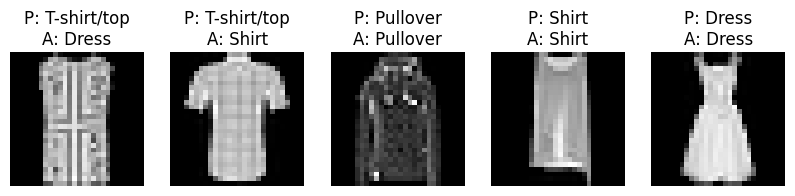


🌀 CNN Sample Predictions:


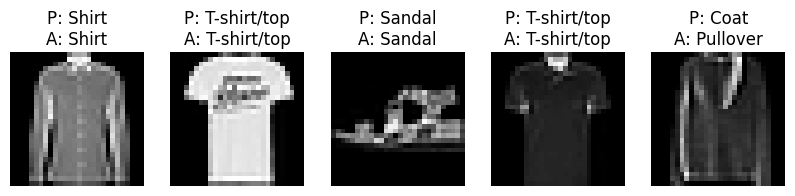

In [ ]:
def show_sample_predictions(model, X_data, y_data, is_cnn=True):
    plt.figure(figsize=(10,5))
    for i in range(5):
        idx = np.random.randint(0, len(X_data))
        img = X_data[idx]
        if not is_cnn:
            img_input = img.reshape(1, 784)
        else:
            img_input = img.reshape(1, 28, 28, 1)
        pred = model.predict(img_input, verbose=0)
        predicted_label = np.argmax(pred)
        plt.subplot(1,5,i+1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f"P: {class_names[predicted_label]}\nA: {class_names[y_data[idx]]}")
        plt.axis('off')
    plt.show()

print("\n🧠 NN Sample Predictions:")
show_sample_predictions(nn_model, X_test, y_test, is_cnn=False)

print("\n🌀 CNN Sample Predictions:")
show_sample_predictions(cnn_model, X_test, y_test, is_cnn=True)

# 7. Plot Training History

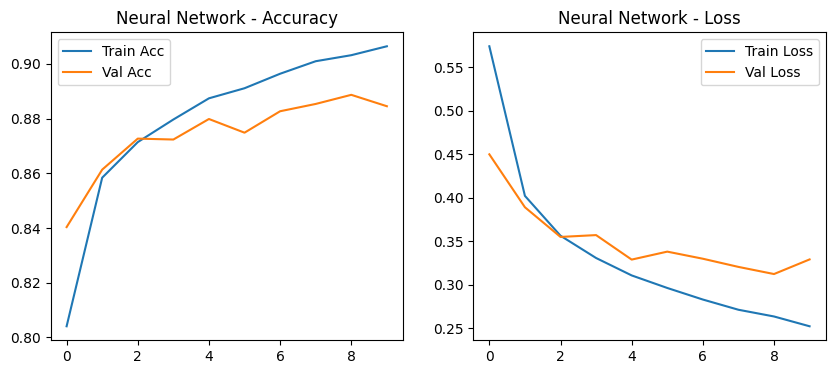

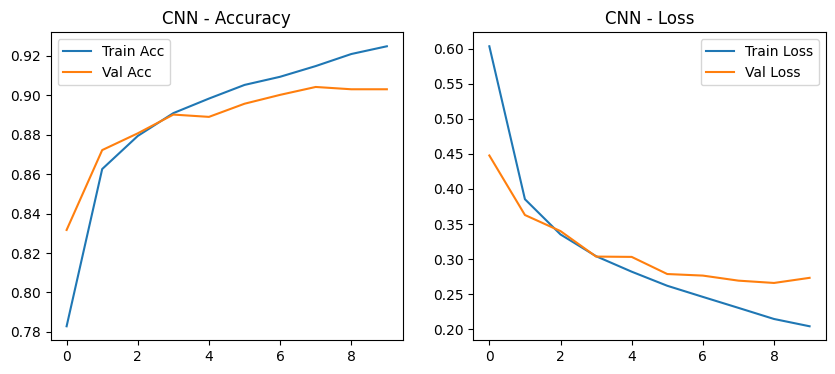

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

plot_history(history_nn, "Neural Network")
plot_history(history_cnn, "CNN")